# Simple Linear Regression

When discussing Linear Regression, two questions arise frequently:

**Question 1:** How do I use my simple linear regression model to make a single prediction, for example, to predict the salary of an employee with 12 years of experience?

**Question 2:** How do I get the final regression equation $y = b_0 + b_1 * x_1$ with the final values of the coefficients $b_0$ and $b_1$?


## Import Libraries

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Import Dataset

In [15]:
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [16]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [17]:
print(y)

[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


## Split Dataset into Training Set and Test Set

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Train Simple Linear Regression Model on Training Set

**Notes:**

* `LinearRegression` is the class used to train linear regression models
* `fit` method is used to train the model on the training set
* `fit` method is used for all types of models:
    * Regression
    * Classification
    * Neural networks

In [19]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predict Test set results

**Notes:**

* Values in the column for the dependent variable in the test set (`y_test`) are the actual values and are known as the 'ground truth'
* `predict` method returns a vector of predicted values (1-dimensional array)
* `y_pred` variable is the vector containing the predicted values

In [20]:
y_pred = regressor.predict(X_test)

In [21]:
print(y_pred.reshape(len(y_pred), 1))

[[ 40748.96184072]
 [122699.62295594]
 [ 64961.65717022]
 [ 63099.14214487]
 [115249.56285456]
 [107799.50275317]]


## Visualize Training Set Results

**Notes:**

* Creates a scatter chart of the training set results
* Plot the best simple linear regression line
* Data points on the line corresponding to the predicted salaries will follow a straight line (linear function)
* One is visualizing the training set so x-coordinates need to be from `X_train`
* One has not yet created a vector of the predicted values of the training set so use the `predict` method to create the vector
* Add titles and labels to the scatter chart

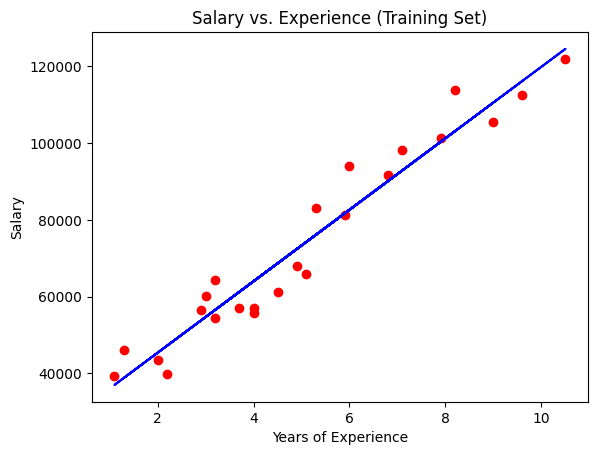

In [22]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs. Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Visualize Test Set Results

**Notes:**

* The same regression line will be plotted regardless if the training or test set is applied

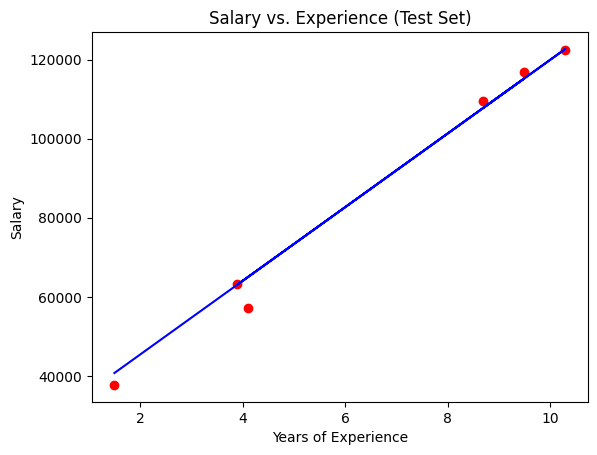

In [23]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.title('Salary vs. Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Make Single Prediction

### Example: The salary of an employee with 12 years of experience

In [24]:
print(regressor.predict([[12]]))

[138531.00067138]


Therefore, our model predicts that the salary of an employee with 12 years of experience is $ 138,531.00.

**Important note:** Notice that the value of the feature (12 years) was input in a double pair of square brackets. That's because the `predict` method always expects a 2D array as the format of its inputs. And putting 12 into a double pair of square brackets makes the input exactly a 2D array. Simply put:

$12 \rightarrow \textrm{scalar}$

$[12] \rightarrow \textrm{1D array}$

$[[12]] \rightarrow \textrm{2D array}$

## Get Final Linear Regression Equation with values of Coefficients

In [25]:
print(regressor.coef_)
print(regressor.intercept_)

[9312.57512673]
26780.099150628157


Therefore, the equation of our simple linear regression model is:

$$\textrm{Salary} = 9312.57 \times \textrm{Years Experience} + 26780.09$$

**Important Note:** To get these coefficients we called the `coef_` and `intercept_` attributes from our regressor object. Attributes in Python are different from methods and usually return a simple value or an array of values.